# P.I.L.L. Milestone 2 Code (Group 11)

*The majority of this code came from class resources, the Dive Into Deep Learning textbook, and homework assignments. Other than that, we used code that we found in our literature review sources, which we have in the 'reference' section of our write up.*

In [1]:
# These are necessary dependencies that we have collected from class and the D2L textbook

import os
import pandas as pd
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split

import torchvision.transforms as transforms
import torchvision.models as models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [2]:
# We all saved the images and metadata table to our Google Drives, since it is a large
# amount of data and we knew that we would be using Google Colab to create this code

# This is us connecting to Drive so that we can access the images/metadata

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading in the Data

In [3]:
# This is a path to the table that has image file names along with the actual names of the pills
# This is what we will use so that we have the accurate pill names for training and testing

file_path = '/content/drive/MyDrive/table.csv'
df = pd.read_csv(file_path)
df.head()


,ndc11,rxcui,name,rxnavImageObjectId,rxnavImageFileName,nlmImageFileName,RXNAV 120,RXBASE 120,RXNAV 300,RXBASE 300,RXNAV 600,RXBASE 600,RXNAV 800,RXBASE 800,RXNAV 1024,RXBASE 1024,RXNAV ORIGINAL,RXBASE ORIGINAL
0,00093-0311-01,978006,Loperamide Hydrochloride 2 MG Oral Capsule,185643662,00093-0311-01_RXNAVIMAGE10_26211358.jpg,00093-0311-01_NLMIMAGE10_6315B1FD.jpg,image/images/gallery/120/00093-0311-01_RXNAVIM...,image/images/gallery/120/00093-0311-01_NLMIMAG...,image/images/gallery/300/00093-0311-01_RXNAVIM...,image/images/gallery/300/00093-0311-01_NLMIMAG...,image/images/gallery/600/00093-0311-01_RXNAVIM...,image/images/gallery/600/00093-0311-01_NLMIMAG...,image/images/gallery/800/00093-0311-01_RXNAVIM...,image/images/gallery/800/00093-0311-01_NLMIMAG...,image/images/gallery/1024/00093-0311-01_RXNAVI...,image/images/gallery/1024/00093-0311-01_NLMIMA...,image/images/gallery/original/00093-0311-01_RX...,image/images/gallery/original/00093-0311-01_NL...
1,00093-3165-01,197985,Minocycline 50 MG Oral Capsule,185646490,00093-3165-01_RXNAVIMAGE10_36231B28.jpg,00093-3165-01_NLMIMAGE10_19270CA8.jpg,image/images/gallery/120/00093-3165-01_RXNAVIM...,image/images/gallery/120/00093-3165-01_NLMIMAG...,image/images/gallery/300/00093-3165-01_RXNAVIM...,image/images/gallery/300/00093-3165-01_NLMIMAG...,image/images/gallery/600/00093-3165-01_RXNAVIM...,image/images/gallery/600/00093-3165-01_NLMIMAG...,image/images/gallery/800/00093-3165-01_RXNAVIM...,image/images/gallery/800/00093-3165-01_NLMIMAG...,image/images/gallery/1024/00093-3165-01_RXNAVI...,image/images/gallery/1024/00093-3165-01_NLMIMA...,image/images/gallery/original/00093-3165-01_RX...,image/images/gallery/original/00093-3165-01_NL...
2,00093-0810-01,198045,Nortriptyline 10 MG Oral Capsule,185646437,00093-0810-01_RXNAVIMAGE10_24231228.jpg,00093-0810-01_NLMIMAGE10_34271A58.jpg,image/images/gallery/120/00093-0810-01_RXNAVIM...,image/images/gallery/120/00093-0810-01_NLMIMAG...,image/images/gallery/300/00093-0810-01_RXNAVIM...,image/images/gallery/300/00093-0810-01_NLMIMAG...,image/images/gallery/600/00093-0810-01_RXNAVIM...,image/images/gallery/600/00093-0810-01_NLMIMAG...,image/images/gallery/800/00093-0810-01_RXNAVIM...,image/images/gallery/800/00093-0810-01_NLMIMAG...,image/images/gallery/1024/00093-0810-01_RXNAVI...,image/images/gallery/1024/00093-0810-01_NLMIMA...,image/images/gallery/original/00093-0810-01_RX...,image/images/gallery/original/00093-0810-01_NL...
3,00093-0811-01,317136,Nortriptyline 25 MG Oral Capsule,185646420,00093-0811-01_RXNAVIMAGE10_20231018.jpg,00093-0811-01_NLMIMAGE10_15270A98.jpg,image/images/gallery/120/00093-0811-01_RXNAVIM...,image/images/gallery/120/00093-0811-01_NLMIMAG...,image/images/gallery/300/00093-0811-01_RXNAVIM...,image/images/gallery/300/00093-0811-01_NLMIMAG...,image/images/gallery/600/00093-0811-01_RXNAVIM...,image/images/gallery/600/00093-0811-01_NLMIMAG...,image/images/gallery/800/00093-0811-01_RXNAVIM...,image/images/gallery/800/00093-0811-01_NLMIMAG...,image/images/gallery/1024/00093-0811-01_RXNAVI...,image/images/gallery/1024/00093-0811-01_NLMIMA...,image/images/gallery/original/00093-0811-01_RX...,image/images/gallery/original/00093-0811-01_NL...
4,00093-0812-01,198046,Nortriptyline 50 MG Oral Capsule,185646464,00093-0812-01_RXNAVIMAGE10_2D2316D8.jpg,00093-0812-01_NLMIMAGE10_DD0E6EE3.jpg,image/images/gallery/120/00093-0812-01_RXNAVIM...,image/images/gallery/120/00093-0812-01_NLMIMAG...,image/images/gallery/300/00093-0812-01_RXNAVIM...,image/images/gallery/300/00093-0812-01_NLMIMAG...,image/images/gallery/600/00093-0812-01_RXNAVIM...,image/images/gallery/600/00093-0812-01_NLMIMAG...,image/images/gallery/800/00093-0812-01_RXNAVIM...,image/images/gallery/800/00093-0812-01_NLMIMAG...,image/images/gallery/1024/00093-0812-01_RXNAVI...,image/images/gallery/1024/00093-0812-01_NLMIMA...,image/images/gallery/original/00093-0812-01_RX...,image/images/gallery/original/00093-0812-01_NL...


In [4]:
# Import dependencies again

import pandas as pd
import os

# Accessing specifically the NLM images since these are only of the pill and do not have
# any words in the background of the picture (the rxnav images have that)

df = df[['name', 'nlmImageFileName']]
image_dir = "/content/drive/MyDrive/300"

df['full_path'] = df['nlmImageFileName'].apply(
    lambda x: os.path.join(image_dir, os.path.basename(str(x)))
)

df['exists'] = df['full_path'].apply(os.path.exists)

# Reporting results to make sure the dataframe exists and loaded all of the images

total = len(df)
found = df['exists'].sum()
missing = total - found

# Printing to make sure we did not lose any images in this process

print(f"Found {found} out of {total} images.")
print(f"Missing {missing} images")

# If we miss any images we want to know which ones they are

print("\nMissing files (first 10):")
print(df.loc[~df['exists'], 'nlmImageFileName'].head(10))

# Keep only the rows with existing images

df_clean = df[df['exists']].reset_index(drop=True)

# Save to CSV for later

df_clean.to_csv("nlm_images_verified.csv", index=False)
print("\n Saved verified file list to 'nlm_images_verified.csv'")

Found 4392 out of 4392 images.
Missing 0 images

Missing files (first 10):
Series([], Name: nlmImageFileName, dtype: object)

 Saved verified file list to 'nlm_images_verified.csv'


*From the output above, we know that we were able to upload all 4,392 images, which is great.*

In [5]:
pd.read_csv("nlm_images_verified.csv")

,name,nlmImageFileName,full_path,exists
0,Loperamide Hydrochloride 2 MG Oral Capsule,00093-0311-01_NLMIMAGE10_6315B1FD.jpg,/content/drive/MyDrive/600/00093-0311-01_NLMIM...,True
1,Minocycline 50 MG Oral Capsule,00093-3165-01_NLMIMAGE10_19270CA8.jpg,/content/drive/MyDrive/600/00093-3165-01_NLMIM...,True
2,Nortriptyline 10 MG Oral Capsule,00093-0810-01_NLMIMAGE10_34271A58.jpg,/content/drive/MyDrive/600/00093-0810-01_NLMIM...,True
3,Nortriptyline 25 MG Oral Capsule,00093-0811-01_NLMIMAGE10_15270A98.jpg,/content/drive/MyDrive/600/00093-0811-01_NLMIM...,True
4,Nortriptyline 50 MG Oral Capsule,00093-0812-01_NLMIMAGE10_DD0E6EE3.jpg,/content/drive/MyDrive/600/00093-0812-01_NLMIM...,True
...,...,...,...,...
4387,Enalapril Maleate 2.5 MG Oral Tablet,16714-0442-01_NLMIMAGE10_DC4D6E2B.jpg,/content/drive/MyDrive/600/16714-0442-01_NLMIM...,True
4388,quinapril 5 MG Oral Tablet,31722-0267-90_NLMIMAGE10_EA507553.jpg,/content/drive/MyDrive/600/31722-0267-90_NLMIM...,True
4389,trospium chloride 20 MG Oral Tablet,00574-0145-60_NLMIMAGE10_3C519E2C.jpg,/content/drive/MyDrive/600/00574-0145-60_NLMIM...,True
4390,metaxalone 400 MG Oral Tablet,64720-0126-10_NLMIMAGE10_C6506353.jpg,/content/drive/MyDrive/600/64720-0126-10_NLMIM...,True


**Label encoding**

In [6]:
# Import dependencies (again)

# we are using this specifically because we want to convert the pill names into
# numeric ids, which are easier to work with

# We sorted the numeric ids and counted them to see the number of unique classes (pills)
# we have images of

from sklearn.preprocessing import LabelEncoder
df_nlm = pd.read_csv("nlm_images_verified.csv")
le = LabelEncoder()
df_nlm = df_nlm.rename(columns={'name': 'label'})
df_nlm['label_id'] = le.fit_transform(df_nlm['label'])
num_classes = len(le.classes_)
print("Classes:", num_classes)


Classes: 2112


*We have 2112 classes*

**Dataset class**

In [7]:
class PillDataset(Dataset):

    def __init__(self, df, transform):
        self.df = df.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        # Our images need to be in RGB to work!
        img = Image.open(row['full_path']).convert('RGB')
        img = self.transform(img)
        label = int(row['label_id'])
        return img, label

**Transforms**

In [8]:
# The numbers in .Normalize() are the standard to use for ImageNet since we are feeding them
# to ResNet

# We are transforming the data to make it standard
# and then packing the images into a tensor so that the network
# processes them without an issue


# train_tfms is to transform the data and helps the model with generalization

train_tfms = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# test_tfms is to does not include the rotation or flip transformations
# because we want the model to deal with the actual image without any artificial
# changes

test_tfms = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])



In [9]:
# This is us creating the full, transformed dataset read for us to split into test/train
# and perform training

# We run the PillDataset class with the images (df_nlm) and state that we
# want it to use train)tfms instead of test_tfms so that it flips and rotates the
# images

full_dataset = PillDataset(df_nlm, transform=train_tfms)

# We want to see the total length of the dataset

total = len(full_dataset)

# Figuring out the sizes of train, val, and test - we chose a 70/15/15 split since
# that was recommended to us in our milestone 1 feedback

train_size = int(0.70 * total)
val_size   = int(0.15 * total)
test_size  = total - train_size - val_size

# Actually creating our train, val, and test datasets using
# the predetermined sizes (from above) and setting the seed equal to 42
# for replication purposes

# The feedback mentioned to do stratified data sampling - since we have ~4000 images
# and 2112 classes this is not feasible for train/val/test

# Instead, we manually confirmed all the classes in test/val are also in train
# and in milestone 3 we plan to subset the data to only include pills with 3
# or more images in each class so that we can stratify accordingly

train_ds, val_ds, test_ds = random_split(
    full_dataset,
    [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(42)
)

# Performing the test transformations on our train, val, and test datasets

train_dataset = train_ds.dataset
train_dataset.transform = train_tfms

val_dataset = val_ds.dataset
val_dataset.transform = test_tfms

test_dataset = test_ds.dataset
test_dataset.transform = test_tfms

# Loading the data with batches of 32 for computational purposes and
# allowing the va;l and test datsets to be shuffled so that we recieve
# accurate measurements

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

# This is so we know exactly how many rows are in train_ds, val_ds, and test_ds

train_size, val_size, test_size


(3074, 658, 660)

*Creating ResNet18 base before training*

In [10]:
# Now we would like to create ResNet18

# Similar to what we did in class and on homework assignment 2,
# we are using 2 3x3 convolutions followed by BatchNorm2d and ReLU

# We also used a skip connection, just like the homework and textbook

# This is the basic way that resNet18 is implemented

class BasicBlock(nn.Module):

    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
             self.shortcut = nn.Sequential(
                 nn.Conv2d(in_channels,out_channels, kernel_size=1, stride=stride, bias=False),
                 nn.BatchNorm2d(out_channels)
             )

# This is standard for our convolutions and including the identity skip connection

    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out +=  self.shortcut(identity)
        out = self.relu(out)
        return out

In [11]:
# import dependency again!


from torch import nn


# This class actually builds the ResNet18. We will use the BasicBlock class
# from above to perform convolutions + BatchNorm2d + ReLU


class ResNet18(nn.Module):
   def __init__(self, num_classes=18, return_features=False):
       super(ResNet18, self).__init__()
       self.return_features = return_features
       self.conv1 = nn.Sequential(
           nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False),
           nn.BatchNorm2d(64),
           nn.ReLU(inplace=True),
           nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
       )


       self.layer1 = self._make_layer(64, 64, 2, stride=1)
       self.layer2 = self._make_layer(64, 128, 2, stride=2)
       self.layer3 = self._make_layer(128, 256, 2, stride=2)
       self.layer4 = self._make_layer(256, 512, 2, stride=2)


       self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
       self.fc = nn.Linear(512, num_classes)


   def _make_layer(self, in_channels, out_channels, num_blocks, stride):
       blocks = []
       blocks.append(BasicBlock(in_channels, out_channels, stride))
       for _ in range(1, num_blocks):
           blocks.append(BasicBlock(out_channels, out_channels))
       return nn.Sequential(*blocks)


   def forward(self, x):
       x = self.conv1(x)
       x = self.layer1(x)
       x = self.layer2(x)
       x = self.layer3(x)
       x = self.layer4(x)


       if self.return_features:
           return x


       x = self.avgpool(x)
       x = torch.flatten(x, 1)
       x = self.fc(x)
       return x


# Actually creating the ResNet18 model and saving it to our devices
model = ResNet18(num_classes=num_classes, return_features=False)
model = model.to(device)


# This is so that we can figure out the loss!


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

**Training!**

In [12]:
# Now we get to train the model!
# Again, most of this code comes from class and homework assignments
# When training we make sure to collect metrics on loss so that we are able to do error analysis and make training curves

def train_one_epoch(model, loader, optimizer):
   model.train()
   total_loss = 0
   correct = 0
   total = 0


   for imgs, labels in loader:
       imgs, labels = imgs.to(device), labels.to(device)

       optimizer.zero_grad()
       outputs = model(imgs)
       loss = criterion(outputs, labels)
       loss.backward()
       optimizer.step()

       total_loss += loss.item() * imgs.size(0)
       _, preds = outputs.max(1)
       correct += preds.eq(labels).sum().item()
       total += labels.size(0)


   return total_loss / total, correct / total


# Setting up so we can evaluate the model with the data we set aside

def evaluate(model, loader):
   model.eval()
   total_loss = 0
   correct = 0
   total = 0


   with torch.no_grad():
       for imgs, labels in loader:
           imgs, labels = imgs.to(device), labels.to(device)

           outputs = model(imgs)
           loss = criterion(outputs, labels)

           total_loss += loss.item() * imgs.size(0)
           _, preds = outputs.max(1)
           correct += preds.eq(labels).sum().item()
           total += labels.size(0)


   return total_loss / total, correct / total

In [13]:
# We chose 10 epochs since this is just a baseline model. We will likely bump it to 20 or 30 epochs in our next milestone

# For the baseline, we just want to see the accuracy for top-1 (k=1). In general, we believe that top-5 (k=5) would perform better. This is something we will include in an ablation test.

epochs = 10


for epoch in range(1, epochs+1):
   train_loss, train_acc = train_one_epoch(model, train_loader, optimizer)
   val_loss, val_acc = evaluate(model, val_loader)


# Getting the loss and accuracy!


   print(f"Epoch {epoch:02d}:")
   print(f"  Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
   print(f"  Val   Loss: {val_loss:.4f} | Val   Acc: {val_acc:.4f}")
   print("-" * 20)


Epoch 01:
  Train Loss: 7.7751 | Train Acc: 0.0102
  Val   Loss: 7.3915 | Val   Acc: 0.0143
--------------------
Epoch 02:
  Train Loss: 7.2774 | Train Acc: 0.0159
  Val   Loss: 6.8491 | Val   Acc: 0.0180
--------------------
Epoch 03:
  Train Loss: 6.8796 | Train Acc: 0.0159
  Val   Loss: 6.4547 | Val   Acc: 0.0239
--------------------
Epoch 04:
  Train Loss: 6.4934 | Train Acc: 0.0221
  Val   Loss: 6.0089 | Val   Acc: 0.0396
--------------------
Epoch 05:
  Train Loss: 6.1363 | Train Acc: 0.0266
  Val   Loss: 5.6761 | Val   Acc: 0.0467
--------------------
Epoch 06:
  Train Loss: 5.7978 | Train Acc: 0.0371
  Val   Loss: 5.2538 | Val   Acc: 0.0742
--------------------
Epoch 07:
  Train Loss: 5.4910 | Train Acc: 0.0458
  Val   Loss: 4.9465 | Val   Acc: 0.0993
--------------------
Epoch 08:
  Train Loss: 5.1956 | Train Acc: 0.0656
  Val   Loss: 4.7997 | Val   Acc: 0.1070
--------------------
Epoch 09:
  Train Loss: 4.9226 | Train Acc: 0.0847
  Val   Loss: 4.3763 | Val   Acc: 0.1396
----

*The ResNet18 that we built from scratch did not work the way that we thought it would, with a final train accuracy of 0.0981 and val accuracy of 0.1412. We decided that we would try feature extraction with RNN to see if that performed better.*

**Feature Extraction ResNet18 + RNN**

In [14]:
# Importing even more dependencies!

import torchvision.models as models
import torch.nn as nn

# Since we are doing feature extraction, we do not use the ResNet18 that we built from scratch,
# we just use the .resnet18 function. We set the weights as "IMAGENET1K_V1" so
# it would be pretrained on ImageNet



model = models.resnet18(weights="IMAGENET1K_V1")

# We replaced the last layer with our own number of classes then saved the model

model.fc = nn.Linear(512, num_classes)
model = model.to(device)

# Finally, we optimized the parameters within the model

optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [15]:
# We want to collect loses and accuracies so that we can assess the model metrics
# and create the training loss charts

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Chose to train for 10 epochs again! Will likely change to 20 or 30 in milestone 3.

epochs = 10

for epoch in range(1, epochs+1):
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer)
    val_loss, val_acc = evaluate(model, val_loader)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

# Printing our training and val losses!

    print(f"Epoch {epoch:02d}:")
    print(f"  Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"  Val   Loss: {val_loss:.4f} | Val   Acc: {val_acc:.4f}")
    print("-" * 20)

Epoch 01:
  Train Loss: 7.8563 | Train Acc: 0.0102
  Val   Loss: 7.0045 | Val   Acc: 0.0178
--------------------
Epoch 02:
  Train Loss: 6.7766 | Train Acc: 0.0326
  Val   Loss: 5.8670 | Val   Acc: 0.1082
--------------------
Epoch 03:
  Train Loss: 5.9509 | Train Acc: 0.0952
  Val   Loss: 5.0198 | Val   Acc: 0.2040
--------------------
Epoch 04:
  Train Loss: 5.2359 | Train Acc: 0.1676
  Val   Loss: 4.3086 | Val   Acc: 0.3026
--------------------
Epoch 05:
  Train Loss: 4.6054 | Train Acc: 0.2454
  Val   Loss: 3.8021 | Val   Acc: 0.3978
--------------------
Epoch 06:
  Train Loss: 4.0123 | Train Acc: 0.3536
  Val   Loss: 3.1420 | Val   Acc: 0.5093
--------------------
Epoch 07:
  Train Loss: 3.4704 | Train Acc: 0.4456
  Val   Loss: 2.6082 | Val   Acc: 0.6134
--------------------
Epoch 08:
  Train Loss: 2.9687 | Train Acc: 0.5455
  Val   Loss: 2.0794 | Val   Acc: 0.7215
--------------------
Epoch 09:
  Train Loss: 2.4852 | Train Acc: 0.6580
  Val   Loss: 1.6428 | Val   Acc: 0.8128
----

*This training and val loss and accuracy are SO much better!*

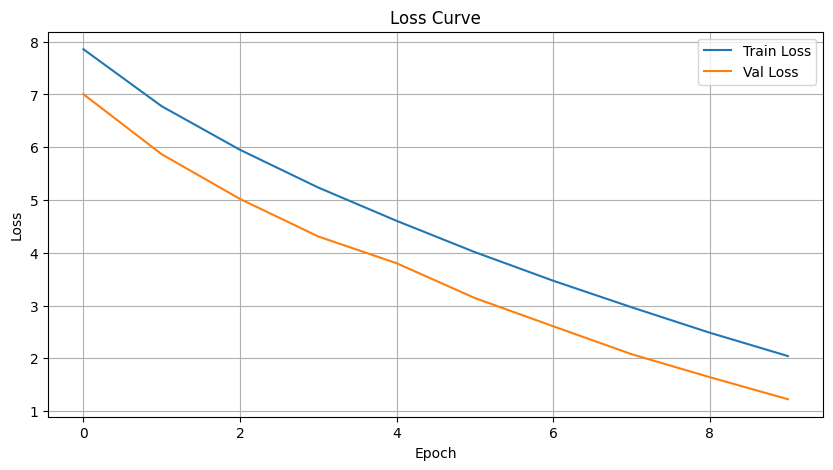

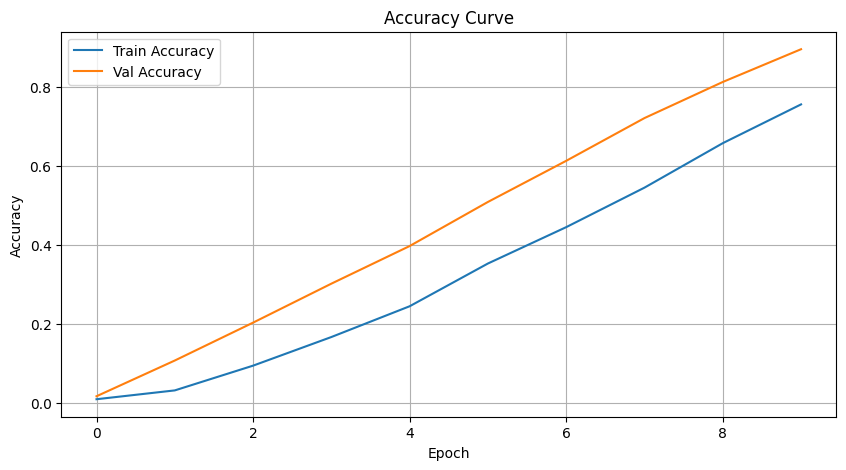

In [16]:
# Making our training/val loss and accuracy curves!

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# This is our final test accuracy: 0.8957194899817851is not bad for a baseline!

test_loss, test_acc = evaluate(model, test_loader)
print("Final Test Accuracy:", test_acc)

Final Test Accuracy: 0.8957194899817851


In [18]:
# Saving the model for the future

torch.save(model.state_dict(), "/content/drive/MyDrive/pill_resnet18.pth")
print("Model saved to Drive!")

Model saved to Drive!


In [19]:
# We have to process the images like we did in our ResNet18 from scratch before
# we can extract the features

preprocess = transforms.Compose([
    transforms.Resize((300,300)),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406],
                         std = [0.229, 0.224, 0.225])
])

In [20]:
# Time to extract the model features!

# Converting them to RGB, processing them so they are in a tensor and normalized,
# and extracting the features

@torch.no_grad()
def extract_features(img_path):
    img = Image.open(img_path).convert("RGB")
    x = preprocess(img).unsqueeze(0).to(device)
    feats = feature_model(x).cpu().squeeze(0)
    return feats

# Running the model for the features then loading it as a dictionary.

feature_model = models.resnet18(weights=None)
feature_model.fc = nn.Identity()
feature_model = feature_model.to(device)
feature_model.load_state_dict(model.state_dict(), strict=False)

# The output of this function is the 512-dim feature vector

feature_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [21]:
# We saved the features to a dictionary to make them accessible

save_path = "/content/drive/MyDrive/pill_features.pt"
create_new_features_dict = True

if create_new_features_dict:
    features_dict = {}

    for idx, row in df_nlm.iterrows():
        label = row["label"]
        img_path = row["full_path"]

        print("Extracting:", label)
        features_dict[label] = extract_features(img_path)

    torch.save(features_dict, save_path)
    print("Saved new features to:", save_path)

else:
    features_dict = torch.load(save_path)
    print("Loaded feature dict with", len(features_dict), "entries.")

Extracting: Loperamide Hydrochloride 2 MG Oral Capsule
Extracting: Minocycline 50 MG Oral Capsule
Extracting: Nortriptyline 10 MG Oral Capsule
Extracting: Nortriptyline 25 MG Oral Capsule
Extracting: Nortriptyline 50 MG Oral Capsule
Extracting: Nortriptyline 75 MG Oral Capsule
Extracting: Hydroxyzine Pamoate 50 MG Oral Capsule
Extracting: Hydroxyzine Pamoate 25 MG Oral Capsule
Extracting: Hydrochlorothiazide 12.5 MG Oral Capsule
Extracting: doxycycline hyclate 50 MG Oral Capsule
Extracting: doxycycline hyclate 100 MG Oral Capsule
Extracting: doxycycline hyclate 100 MG Oral Capsule
Extracting: Fluoxetine 10 MG Oral Capsule
Extracting: Fluoxetine 20 MG Oral Capsule
Extracting: Fluoxetine 40 MG Oral Capsule
Extracting: Hydrochlorothiazide 25 MG / Triamterene 37.5 MG Oral Capsule
Extracting: Cephalexin 500 MG Oral Capsule
Extracting: nan
Extracting: Fluoxetine 40 MG Oral Capsule
Extracting: Indomethacin 25 MG Oral Capsule
Extracting: 24 HR Propranolol Hydrochloride 80 MG Extended Release O

Epoch 01 | Loss: 8.0138 | Accuracy: 0.0000
Epoch 02 | Loss: 7.7834 | Accuracy: 0.0000
Epoch 03 | Loss: 7.7722 | Accuracy: 0.0000
Epoch 04 | Loss: 7.7621 | Accuracy: 0.0000
Epoch 05 | Loss: 7.7531 | Accuracy: 0.0000
Epoch 06 | Loss: 7.7450 | Accuracy: 0.0000
Epoch 07 | Loss: 7.7378 | Accuracy: 0.0000
Epoch 08 | Loss: 7.7313 | Accuracy: 0.0000
Epoch 09 | Loss: 7.7255 | Accuracy: 0.0000
Epoch 10 | Loss: 7.7203 | Accuracy: 0.0000


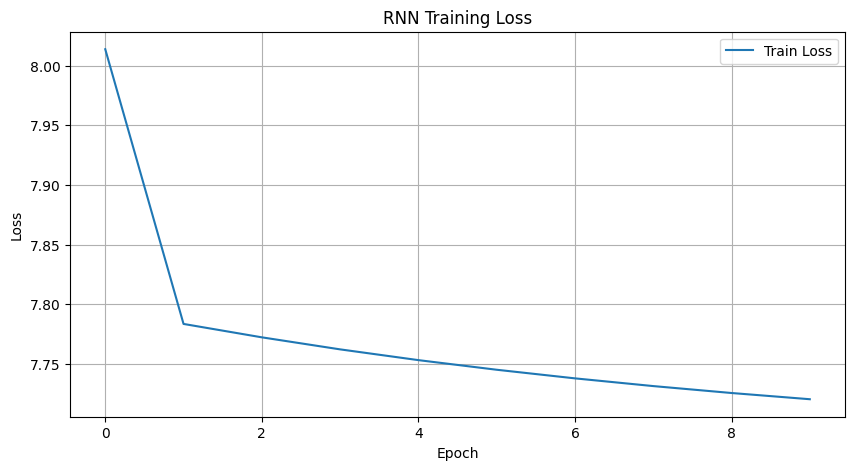

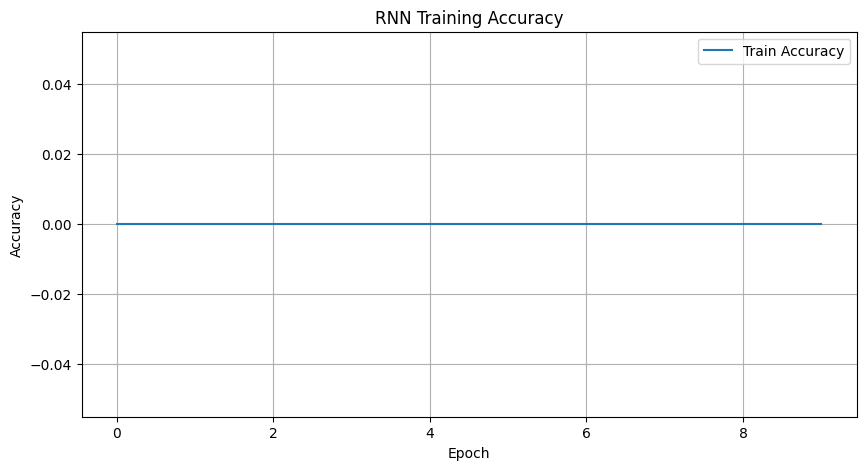

In [22]:
import torch.optim as optim

# Have to create sequences

def rnn_sequence(embed):
    embed = embed.flatten()
    seq = embed.unsqueeze(1).unsqueeze(1)
    return seq

# Getting the inputs for RNN from the feature_dicts that we made above

rnn_inputs = {}
for pill_name, embed_tensor in features_dict.items():
    rnn_inputs[pill_name] = rnn_sequence(embed_tensor)

# This is the RNN!

rnn = nn.RNN(input_size=1,
             hidden_size=256,
             num_layers=2,
             nonlinearity='relu',
             bidirectional=True).to(device)

# Getting all of the distinct pill names from the rnn inputs (pills in feature dicts)
# So we know the number of classes

pill_names = list(rnn_inputs.keys())
num_classes = len(pill_names)

# We need this to be linear

fc = nn.Linear(256*2, num_classes).to(device)

# We did it this way instead of using the LabelEncoder like we did for the scratch ResNet18
# Since we can easily grab it from the features dict we made

pill_to_idx = {name: i for i, name in enumerate(pill_names)}

# Getting loss and optimizing

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(list(rnn.parameters()) + list(fc.parameters()), lr=1e-3)

# This is similar to the training we did for the scratch ResNet18, with
# a few adjustments

def train_one_epoch(rnn, fc, rnn_inputs, optimizer, criterion):
    rnn.train()
    fc.train()
    total_loss = 0
    correct = 0
    total = 0

    # Labeling

    for pill_name, seq_features in rnn_inputs.items():
        seq_features = seq_features.to(device)
        label_idx = torch.tensor([pill_to_idx[pill_name]], device=device)

        optimizer.zero_grad()
        rnn_out, hidden = rnn(seq_features)

        forward = hidden[-2, :, :]
        backward = hidden[-1, :, :]
        rnn_vector = torch.cat([forward, backward], dim=1)

        logits = fc(rnn_vector)
        loss = criterion(logits, label_idx)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        predicted_idx = torch.argmax(logits, dim=1).item()
        if predicted_idx == label_idx.item():
            correct += 1
        total += 1

    return total_loss / total, correct / total

# The evaluate function like the one in the from scratch ResNet18!

def evaluate(rnn, fc, rnn_inputs, criterion):
    rnn.eval()
    fc.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for pill_name, seq_features in rnn_inputs.items():
            seq_features = seq_features.to(device)
            label_idx = torch.tensor([pill_to_idx[pill_name]], device=device)

            rnn_out, hidden = rnn(seq_features)
            forward = hidden[-2, :, :]
            backward = hidden[-1, :, :]
            rnn_vector = torch.cat([forward, backward], dim=1)

            logits = fc(rnn_vector)
            loss = criterion(logits, label_idx)

            total_loss += loss.item()
            predicted_idx = torch.argmax(logits, dim=1).item()
            if predicted_idx == label_idx.item():
                correct += 1
            total += 1

    return total_loss / total, correct / total

# Training loop just like the one in the from scratch ResNet18

train_losses, train_accuracies = [], []

for epoch in range(1, 11):
    train_loss, train_acc = train_one_epoch(rnn, fc, rnn_inputs, optimizer, criterion)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    print(f"Epoch {epoch:02d} | Loss: {train_loss:.4f} | Accuracy: {train_acc:.4f}")

# Plotting our training curves

plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Train Loss')
plt.title('RNN Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.title('RNN Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

*DeepTextSpotter vs ASTER is going to come in milestone 3!*